##Task-1:-  To find histogram value and display histogram of a grayscale and color image

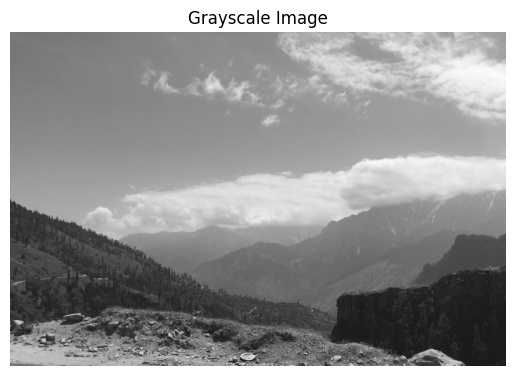

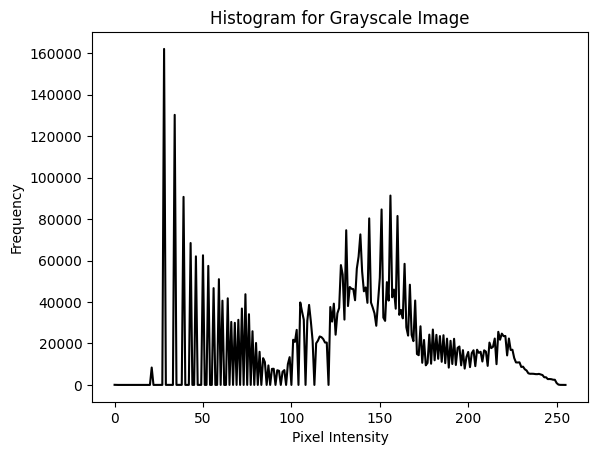

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = 'image.png'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if gray_image is None:
    print("Error: Unable to load image.")
else:
    # Display the grayscale image
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()

    # Calculate the histogram for the grayscale image
    hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.plot(hist_gray, color='black')
    plt.title('Histogram for Grayscale Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

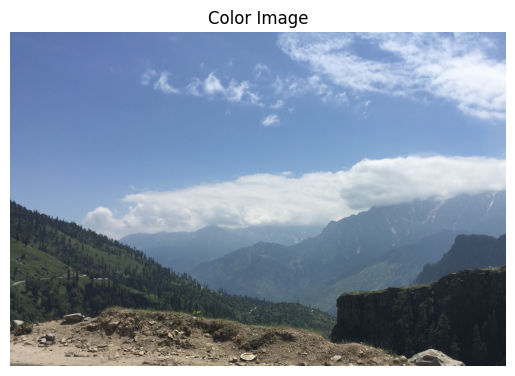

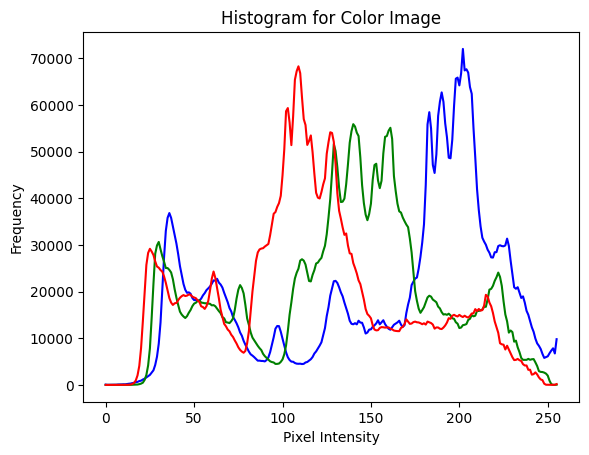

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the color image
image_path = 'image.png'
color_image = cv2.imread(image_path)

# Convert BGR to RGB for correct display in Matplotlib
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Display the color image
plt.imshow(color_image_rgb)
plt.title('Color Image')
plt.axis('off')
plt.show()

# Calculate and plot the histogram for each color channel
colors = ('b', 'g', 'r')
plt.figure()
plt.title('Histogram for Color Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

for i, color in enumerate(colors):
    hist = cv2.calcHist([color_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.show()

##To perform Discrete Fourier transform (FFT) and Inverse Fourier transform (IFFT) to an image.

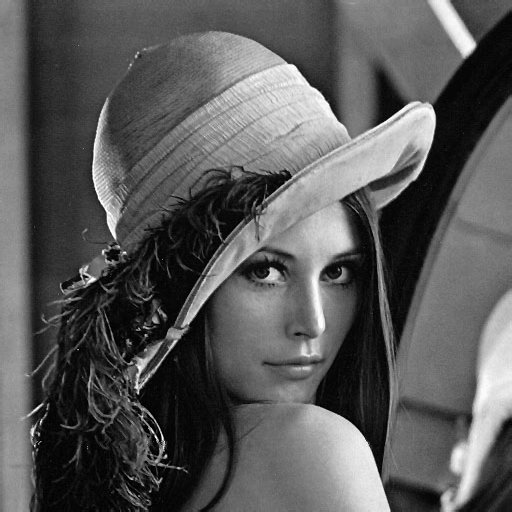

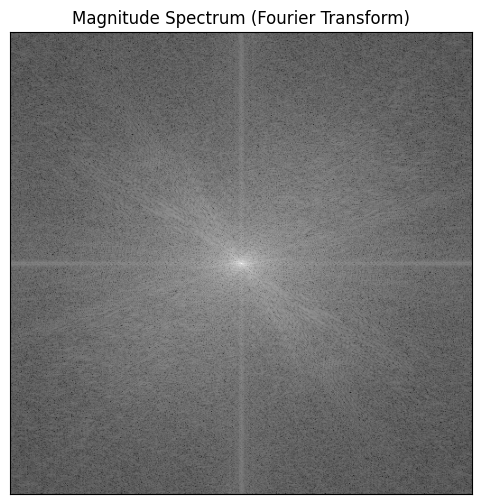

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image_path = "Picture2.jpg"
image = cv2.imread(image_path, 0)

# Display the original image using cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step 1: Compute the 2D Fourier Transform
f_transform = np.fft.fft2(image)  # 2D Fourier Transform

# Step 2: Shift the zero frequency component to the center
f_shift = np.fft.fftshift(f_transform)

# Step 3: Compute the magnitude spectrum (log scale for better visualization)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # +1 to avoid log(0)

# Step 4: Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.xticks([]), plt.yticks([])
plt.show()

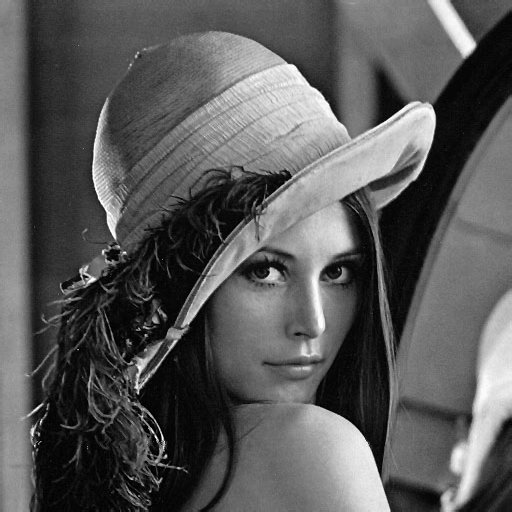

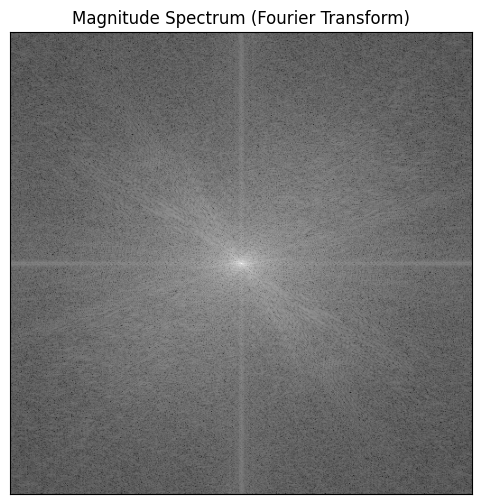

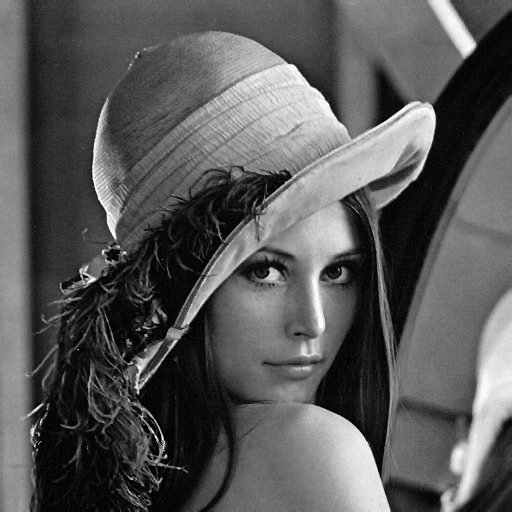

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image in grayscale mode
image_path = "Picture2.jpg"
image = cv2.imread(image_path, 0)

# Display the original image
cv2_imshow(image)

# Step 1: Compute the Fourier Transform
f_transform = np.fft.fft2(image)

# Step 2: Shift the zero frequency component to the center
f_shift = np.fft.fftshift(f_transform)

# Step 3: Compute the magnitude spectrum (log scale for better visualization)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
# Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (Fourier Transform)")
plt.xticks([]), plt.yticks([])
plt.show()

# Step 4: Inverse Fourier Transform to reconstruct the image
# Inverse shift to move the zero frequency component back to its original position
f_ishift = np.fft.ifftshift(f_shift)

# Inverse Fourier Transform
image_back = np.fft.ifft2(f_ishift)

# Take the absolute value to get the real part of the image
image_back = np.abs(image_back)

# Step 5: Display the reconstructed image (after Inverse Fourier Transform)
cv2_imshow(image_back.astype(np.uint8))

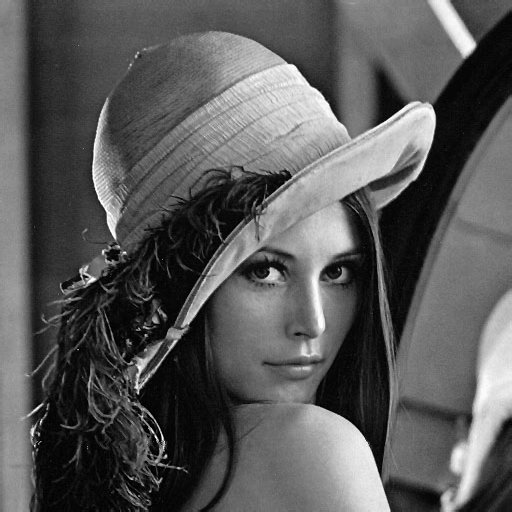

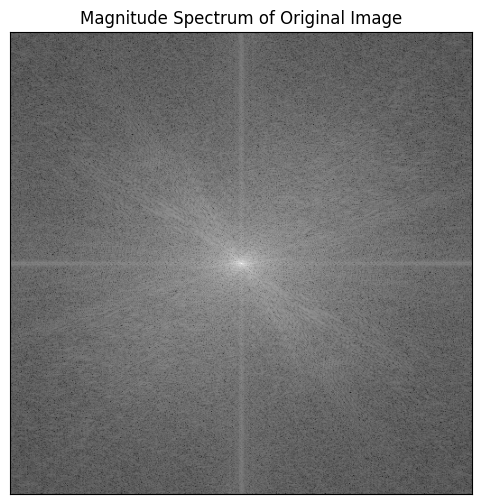

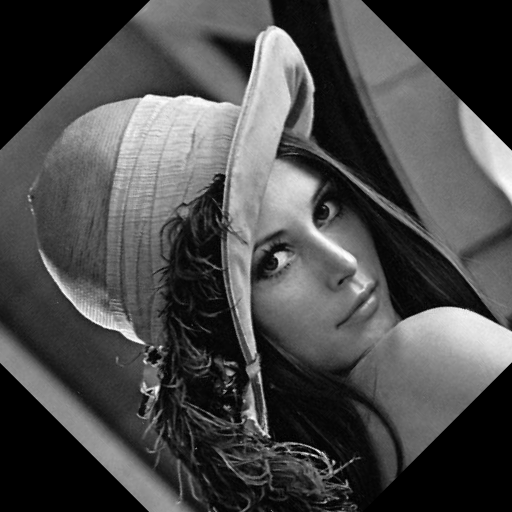

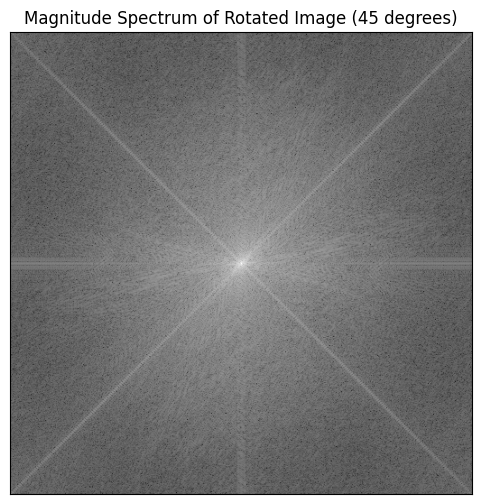

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# Function to compute the Fourier Transform and its magnitude spectrum
def compute_fourier(image):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log(np.abs(f_shift) + 1)
    return magnitude_spectrum

# Step 1: Load the original image in grayscale mode
image_path = "Picture2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
cv2_imshow(image)

# Step 2: Compute the Fourier Transform of the original image
magnitude_spectrum_original = compute_fourier(image)

# Display the magnitude spectrum of the original image
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum of Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

###


# Step 3: Rotate the image by 45 degrees
angle = 45
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Display the rotated image
cv2_imshow(rotated_image)

# Step 4: Compute the Fourier Transform of the rotated image
magnitude_spectrum_rotated = compute_fourier(rotated_image)

# Display the magnitude spectrum of the rotated image
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum_rotated, cmap="gray")
plt.title(f'Magnitude Spectrum of Rotated Image ({angle} degrees)')
plt.xticks([]), plt.yticks([])
plt.show()